<font size = 4 color='orange'>Implementing 3 Different Gradient Descent Functions from scratch

<Font size=3 color='darkblue'>Importing Libraries

In [38]:
import pandas as pd #To read and edit tabular data
import numpy as np #To perform array/matrix operations
import math #For mathematical opeartions
import random #To generate random numbers
from prettytable import PrettyTable #
import matplotlib.pyplot as plt #To perform plotting
%matplotlib inline
import seaborn as sns  #To perform visualization
sns.set_style('whitegrid')
import warnings #To ignore warnings
warnings.filterwarnings('ignore')

<Font size=3 color='darkblue'>Reading the data

In [39]:
data = pd.read_csv('Classification_Data.csv')

Checking the head of the data

In [40]:
data.head()

,Input1,Input2,Class
0,3.62160,8.6661,0
1,4.54590,8.1674,0
2,3.86600,-2.6383,0
3,3.45660,9.5228,0
4,0.32924,-4.4552,0


In [41]:
data.shape

(1372, 3)

<AxesSubplot:xlabel='Class', ylabel='count'>

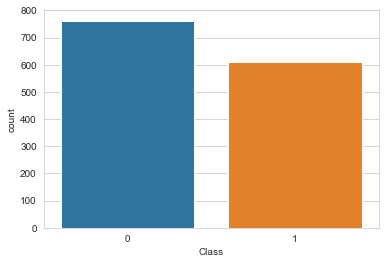

In [42]:
sns.countplot(x='Class', data=data)

<font size=3 color='grey'>Dataset is almost well balanced

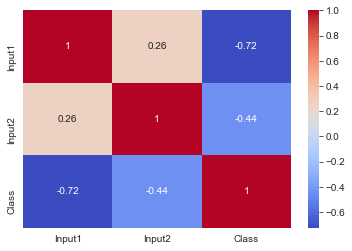

In [43]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

<font size=3 color='grey'>The 2 input variables have high correlation with the class labels

Plotting the data 

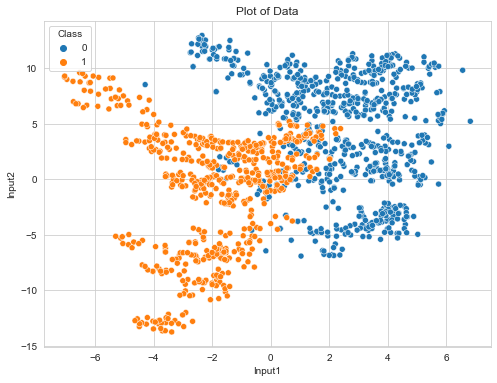

In [44]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Input1', y='Input2', hue='Class', data=data, color='orange')
plt.title("Plot of Data")
plt.show()

In [45]:
x = data.drop('Class', axis=1).values
y = data['Class'].values

<font size=3 color='blue'> Initializing the Weights

In [46]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    w = np.zeros((len(dim)), dtype = float)
    b = 0
    return w,b

<font size=3 color='blue'>Sigmoid function

$sigmoid(z)= 1/(1+exp(-z))$

In [47]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    return 1/(1+math.exp(-z))

<font size=3 color='blue'>Logistic Loss Function

 $log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Yt*log10(Y_{pred})+(1-Yt)*log10(1-Y_{pred}))$

In [48]:
def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''
    computed_loss = 0
    for idx in range(len(y_true)):
        computed_loss += y_true[idx] * np.log10(y_pred[idx]) + (1-y_true[idx]) * np.log10(1-y_pred[idx])
    loss = (-1)*computed_loss/len(y_true)
    return loss

<font size=3 color='blue'>Compute gradient w.r.to  'w' </font>

$dw^{(t)} = -x_n*y_n*(1 − σ((w^{(t)})^{T} x_n+b^{t}))$ <br>

In [49]:
def gradient_dw(x,y,w,b):
    '''In this function, we will compute the gardient w.r.to w '''
    z = np.dot(w,x)+b
    dw = -x * y*(1-sigmoid(z))
    return dw

<font size=3 color='blue'>Compute gradient w.r.to 'b' </font>

$ db^{(t)} = -y_n*(1- σ((w^{(t)})^{T} x_n+b^{t}))$

In [50]:
def gradient_db(x,y,w,b):
    '''In this function, we will compute gradient w.r.to b '''
    z = np.dot(w, x) + b
    db = -y*(1 - sigmoid(z))
    return db

<font size=3 color='blue'>Computing Predicted probability </font>

In [51]:
def pred(X, w, b):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        predict.append(sigmoid(z))
    return np.array(predict)

<font size=3 color='blue'>Plotting the line

In [52]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a  ; y == minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a  ; y == maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1], c = 'green')

<font size = 4 color='orange'>Normal Gradient Descent

In normal gradient descent, to update the weights we pass in all the data points for each iteration

In [53]:
def GradientDesent(x,y,iterations,eta0):
    ''' In this function, we will implement logistic regression'''
     #Initialzing weights
    w, b = initialize_weights(x[0])
    
    #Creating empty lists to store the loss, slope and intercept values for each epoch
    loss_values = []
    w_values = []
    b_values = []
    
    for iteration in range(iterations):#Loop runs for no. of epochs
        dw = 0
        db = 0
        for idx in range(len(x)): # for each datapoint
            
            #Calculating Gradient Descent for slope 
            dw += gradient_dw(x[idx], y[idx], w, b)
            
            #Calculating Gradient Descent for Intercept
            db += gradient_db(x[idx], y[idx], w, b)
            
        #updating the slope value(with slope of all values)
        w = w - eta0 * dw/len(x)

        #updating the intercept value(with intercept of all values)
        b = b - eta0 * db/len(x)

        #appending values to the list
        w_values.append(w)
        b_values.append(b)
        
        #Predicting target variable for Train data and computing loss for the same.
        y_pred = pred(x, w, b)
        loss_iter = logloss(y,y_pred)
        loss_values.append(loss_iter) #Appending to the list
       
    #Plotting loss values
    plt.plot(range(iterations), loss_values, label="Log Loss")  
    plt.title("Iteration vs Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
        
    return w_values, b_values, loss_values

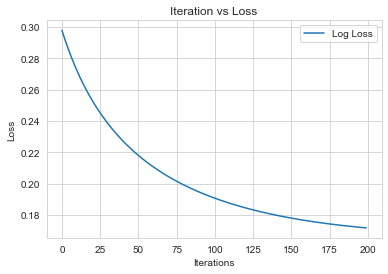

In [54]:
eta0 = 0.01 #Learning rate
iters = 200 #No. of iterations

w_values, b_values, loss_values = GradientDesent(x,y,iters,eta0)

<font size=3 color='blue'>Getting the best values for slope and Intercept

In [55]:
w_opt_gd, b_opt_gd, epoch_gd, min_loss_gd = 0, 0, 0, 0

for idx in range(1, len(loss_values)):
    loss_diff = loss_values[idx-1] - loss_values[idx]
    
    if loss_diff < 0.0001 : # checking if the loss values are improved
        epoch_gd = idx+1
        min_loss_gd = loss_values[idx]
        print('for epoch {} - Minimun loss: {}'.format(epoch_gd, min_loss_gd))
        w_opt_gd = w_values[idx-1]
        b_opt_gd = b_values[idx-1]
        break # Terminating the loop if there is no improvment in the loss
    else:
        continue
print("Best slope: ", w_opt_gd)
print("Best intercept: ", b_opt_gd)

for epoch 192 - Minimun loss: 0.17260199952103356
Best slope:  [-0.40533935 -0.04227058]
Best intercept:  0.3009541078958172


<font size=3 color='blue'>Plotting

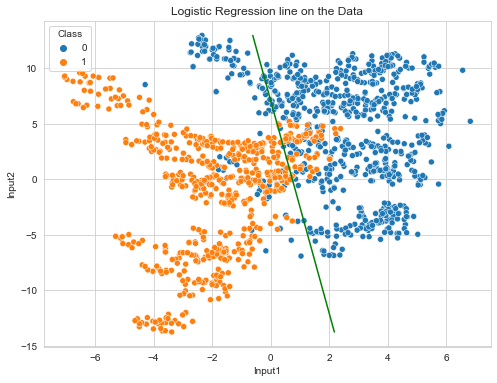

In [56]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Input1', y='Input2', hue='Class', data=data, color='orange')
draw_line(w_opt_gd, b_opt_gd, min(x[:,1]), max(x[:,1]))
plt.title("Logistic Regression line on the Data")
plt.show()

<font size = 4 color='orange'>Stochastic Gradient Descent

In Stochastic gradient descent, to update the weights we pass only one data point at a time

In [57]:
def StochasticGradientDesent(x,y,epochs,eta0):
    ''' In this function, we will implement logistic regression'''
     #Initialzing weights
    w, b = initialize_weights(x[0])
    
    #Creating empty lists to store the loss, slope and intercept values for each epoch
    loss_values = []
    w_values = []
    b_values = []
    
    for epoch in range(epochs):#Loop runs for no. of epochs
        idx = random.randint(0, len(x)-1)
        #Calculating Gradient Descent for slope using one point and updating the values
        w += - eta0 * gradient_dw(x[idx], y[idx], w, b)

        #Calculating Gradient Descent for Intercept using one point and updating the values
        b += - eta0 * gradient_db(x[idx], y[idx], w, b)

        #appending values to the list after one epoch
        w_values.append(w)
        b_values.append(b)
        
        #Predicting target variable for Train data and computing loss for the same.
        y_pred = pred(x, w, b)
        loss_iter = logloss(y,y_pred)
        loss_values.append(loss_iter) #Appending to the list
        
    #Plotting loss values
    plt.plot(range(epochs), loss_values, label="Log Loss")  
    plt.title("Iteration vs Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
        
    return w_values, b_values, loss_values

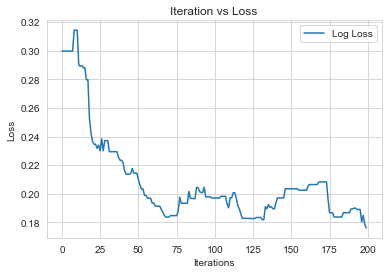

In [58]:
eta0 = 0.01 #Learning rate
epochs = 200 #No. of iterations

w_values, b_values, loss_values = StochasticGradientDesent(x,y,epochs,eta0)

<font size=3 color='blue'>Getting the best values for slope and Intercept

In [59]:
w_opt_sgd, b_opt_sgd, epoch_sgd, min_loss_sgd = 0, 0, 0, 0

index = loss_values.index(min(loss_values)) #index for min loss
epoch_sgd = index+1 #epoch
min_loss_sgd = loss_values[index] #min loss

print('for epoch {} - Minimun loss: {}'.format(epoch_sgd, min_loss_sgd))

w_opt_sgd = w_values[index] #optimal slope
b_opt_sgd = b_values[index] #optimal intercept

print("Best slope: ", w_opt_sgd)
print("Best intercept: ", b_opt_sgd)

for epoch 200 - Minimun loss: 0.1760899699310145
Best slope:  [-0.39484276 -0.03767615]
Best intercept:  0.30738558369668845


<font size=3 color='blue'>Plotting

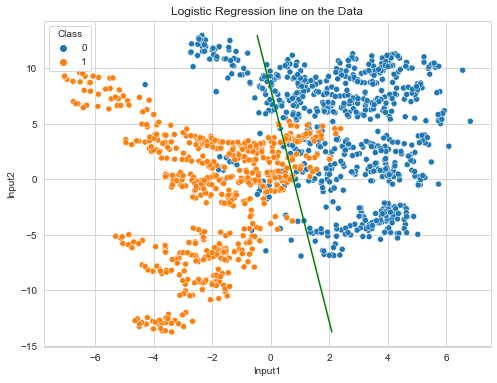

In [60]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Input1', y='Input2', hue='Class', data=data, color='orange')
draw_line(w_opt_sgd, b_opt_sgd, min(x[:,1]), max(x[:,1]))
plt.title("Logistic Regression line on the Data")
plt.show()

<font size = 4 color='orange'>Mini-Batch Stochastic Gradient Descent

In Mini-Batch SGD, to update the weights we pass batch of data points at a time

In [61]:
print(list(np.random.randint(low = 0,high=len(x)-1,size=100)))

[271, 159, 1224, 1019, 853, 1317, 112, 151, 850, 526, 534, 297, 1341, 418, 1145, 241, 1175, 1209, 678, 288, 890, 348, 156, 976, 1051, 326, 1276, 1179, 1308, 75, 1061, 516, 903, 893, 186, 491, 739, 823, 159, 790, 1315, 943, 577, 770, 503, 500, 611, 140, 1015, 447, 357, 213, 1344, 1350, 735, 984, 583, 1011, 1181, 961, 975, 306, 529, 1353, 747, 1197, 914, 1158, 430, 295, 918, 841, 94, 809, 15, 54, 202, 609, 201, 1336, 193, 851, 250, 442, 44, 916, 718, 789, 648, 302, 88, 80, 294, 81, 654, 746, 445, 26, 80, 1254]


In [62]:
def mini_batchSGD(x,y,epochs,eta0, batch_size):
    ''' In this function, we will implement logistic regression'''
     #Initialzing weights
    w, b = initialize_weights(x[0])
    
    #Creating empty lists to store the loss, slope and intercept values for each epoch
    loss_values = []
    w_values = []
    b_values = []
    
    for epoch in range(epochs):#Loop runs for no. of epochs
        dw = 0
        db = 0
        batch = list(np.random.randint(low = 0, high=len(x)-1, size=batch_size))
        for idx in batch: # for each datapoint
            
            #Calculating Gradient Descent for slope 
            dw += gradient_dw(x[idx], y[idx], w, b)
            
            #Calculating Gradient Descent for Intercept
            db += gradient_db(x[idx], y[idx], w, b)
            
        #updating the slope value(with slope of all values)
        w = w - eta0 * dw/batch_size

        #updating the intercept value(with intercept of all values)
        b = b - eta0 * db/batch_size

        #appending values to the list
        w_values.append(w)
        b_values.append(b)
        
        #Predicting target variable for Train data and computing loss for the same.
        y_pred = pred(x, w, b)
        loss_iter = logloss(y,y_pred)
        loss_values.append(loss_iter) #Appending to the list
       
    #Plotting loss values
    plt.plot(range(epochs), loss_values, label="Log Loss")  
    plt.title("Iteration vs Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
        
    return w_values, b_values, loss_values

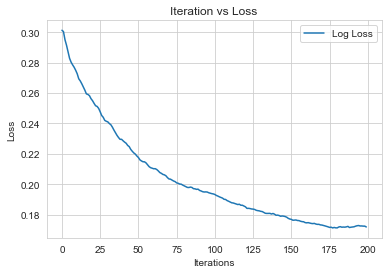

In [63]:
eta0 = 0.01 #Learning rate
epochs = 200 #No. of iterations
batch_size = 100 #Mini Batch Size

w_values, b_values, loss_values = mini_batchSGD(x, y, epochs, eta0, batch_size)

<font size=3 color='blue'>Getting the best values for slope and Intercept

In [64]:
w_opt_mbsgd, b_opt_mbsgd, epoch_mbsgd, min_loss_mbsgd = 0, 0, 0, 0


for idx in range(1, len(loss_values)):
    loss_diff = loss_values[idx-1] - loss_values[idx]
    
    if loss_diff < 0.0001 : # checking if the loss values are improved
        epoch_mbsgd = idx+1
        min_loss_mbsgd = loss_values[idx]
        print('for epoch {} - Minimun loss: {}'.format(epoch_mbsgd, min_loss_mbsgd))
        
        w_opt_mbsgd = w_values[idx-1]
        b_opt_mbsgd = b_values[idx-1]
        break # Terminating the loop if there is no improvment in the loss
    else:
        continue
print("Best slope: ", w_opt_mbsgd)
print("Best intercept: ", b_opt_mbsgd)

for epoch 40 - Minimun loss: 0.22955761827488536
Best slope:  [-0.12766616 -0.04881372]
Best intercept:  0.07756435298452019


<font size=3 color='blue'>Plotting

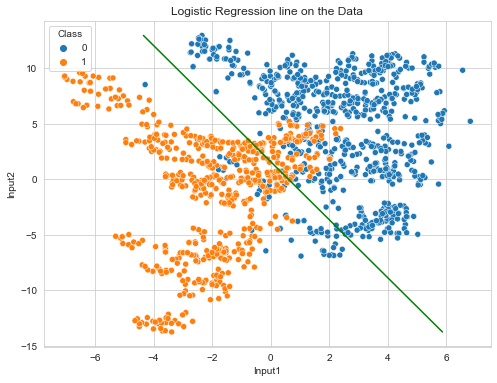

In [65]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Input1', y='Input2', hue='Class', data=data, color='orange')
draw_line(w_opt_mbsgd, b_opt_mbsgd, min(x[:,1]), max(x[:,1]))
plt.title("Logistic Regression line on the Data")
plt.show()

<font size=3 color='blue'>Summary

In [66]:
summary = PrettyTable()
summary.field_names = ["Type", "Method", "Epoch", "Loss", 'Coefficients', "Intercept"]
summary.add_row(["Classification","Gradient Descent",epoch_gd, round(min_loss_gd,4), w_opt_gd, b_opt_gd])
summary.add_row(["Classification","Stochastic GD",epoch_sgd, round(min_loss_sgd,4), w_opt_sgd, b_opt_sgd])
summary.add_row(["Classification","Mini-Batch SGD",epoch_mbsgd, round(min_loss_mbsgd,4), w_opt_mbsgd, b_opt_mbsgd])
print(summary)

+----------------+------------------+-------+--------+---------------------------+---------------------+
|      Type      |      Method      | Epoch |  Loss  |        Coefficients       |      Intercept      |
+----------------+------------------+-------+--------+---------------------------+---------------------+
| Classification | Gradient Descent |  192  | 0.1726 | [-0.40533935 -0.04227058] |  0.3009541078958172 |
| Classification |  Stochastic GD   |  200  | 0.1761 | [-0.39484276 -0.03767615] | 0.30738558369668845 |
| Classification |  Mini-Batch SGD  |   40  | 0.2296 | [-0.12766616 -0.04881372] | 0.07756435298452019 |
+----------------+------------------+-------+--------+---------------------------+---------------------+


_Conclusion:_<br>
1. **Epochs:** Mini Batch SGD converges much faster than other two.
2. __Run time:__ SGD will take much less time compared to other because they were running on all data points in each epoch while SGD use only one point.
3. __Min Loss:__ Loss is higher for min-batch SGD over other two.
4. __Parameters:__ Coefficients and Intercepts for GD and SGD methods are almost similar.
5. **Plot:** Plots for GD and SGD are similar<br>